In [1]:
!pip3 install pandas
!pip3 install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np

def clean_gdp_data():
    # Read the CSV file
    df = pd.read_csv('datasets/us-gov-data.csv')
    
    # Get the original column names
    original_cols = df.columns.tolist()
    
    # Create new column names mapping
    new_columns = {
        original_cols[0]: 'Line',
        original_cols[1]: 'Description',
        original_cols[2]: '2021_Annual',
        original_cols[3]: '2022_Annual',
        original_cols[4]: '2023_Annual',
        original_cols[5]: '2020_Q3',
        original_cols[6]: '2020_Q4',
        original_cols[7]: '2021_Q1',
        original_cols[8]: '2021_Q2',
        original_cols[9]: '2021_Q3',
        original_cols[10]: '2021_Q4',
        original_cols[11]: '2022_Q1',
        original_cols[12]: '2022_Q2',
        original_cols[13]: '2022_Q3',
        original_cols[14]: '2022_Q4',
        original_cols[15]: '2023_Q1',
        original_cols[16]: '2023_Q2',
        original_cols[17]: '2023_Q3',
        original_cols[18]: '2023_Q4',
        original_cols[19]: '2024_Q1',
        original_cols[20]: '2024_Q2'
    }
    
    # Rename the columns
    df = df.rename(columns=new_columns)
    
    # Convert numeric columns to float, replacing '.....*.' with NaN
    numeric_cols = df.columns[2:]  # All columns except Line and Description
    for col in numeric_cols:
        df[col] = df[col].replace('.....*.',np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    return df

# Clean the data
gdp_df = clean_gdp_data()

# Display information about the dataset
print("\n=== First 5 Rows ===")
print(gdp_df.head())

print("\n=== Column Names ===")
print("\nAll columns:", gdp_df.columns.tolist())
print("\nNumber of columns:", len(gdp_df.columns))

print("\n=== Dataset Info ===")
print(gdp_df.info())

# Save the cleaned data
gdp_df.to_csv('cleaned_gdp_data.csv', index=False)
print("\nCleaned data saved to 'cleaned_gdp_data.csv'")


=== First 5 Rows ===
   Line                        Description  2021_Annual  2022_Annual  \
0  Line                                NaN       2021.0       2022.0   
1   NaN                                NaN          NaN          NaN   
2   NaN                                NaN          NaN          NaN   
3     1       Gross domestic product (GDP)          6.1          2.5   
4     2  Personal consumption expenditures          8.8          3.0   

   2023_Annual  2020_Q3  2020_Q4  2021_Q1  2021_Q2  2021_Q3  ...  2022_Q1  \
0       2023.0      NaN      NaN      NaN      NaN      NaN  ...      NaN   
1          NaN   2020.0      NaN   2021.0      NaN      NaN  ...   2022.0   
2          NaN      NaN      NaN      NaN      NaN      NaN  ...      NaN   
3          2.9     35.2      4.4      5.6      6.4      3.5  ...     -1.0   
4          2.5     41.2      5.8      9.5     14.1      3.1  ...      1.0   

   2022_Q2  2022_Q3  2022_Q4  2023_Q1  2023_Q2  2023_Q3  2023_Q4  2024_Q1  \
0    

In [11]:
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")
# Replace `row_index` with the index number of the row you want to print
row_data = data_new.iloc[0]
print(row_data)


Line                                      1
Description    Gross domestic product (GDP)
2021_Annual                             6.1
2022_Annual                             2.5
2023_Annual                             2.9
2020_Q3                                35.2
2020_Q4                                 4.4
2021_Q1                                 5.6
2021_Q2                                 6.4
2021_Q3                                 3.5
2021_Q4                                 7.4
2022_Q1                                -1.0
2022_Q2                                 0.3
2022_Q3                                 2.7
2022_Q4                                 3.4
2023_Q1                                 2.8
2023_Q2                                 2.4
2023_Q3                                 4.4
2023_Q4                                 3.2
2024_Q1                                 1.6
2024_Q2                                 3.0
Name: 0, dtype: object


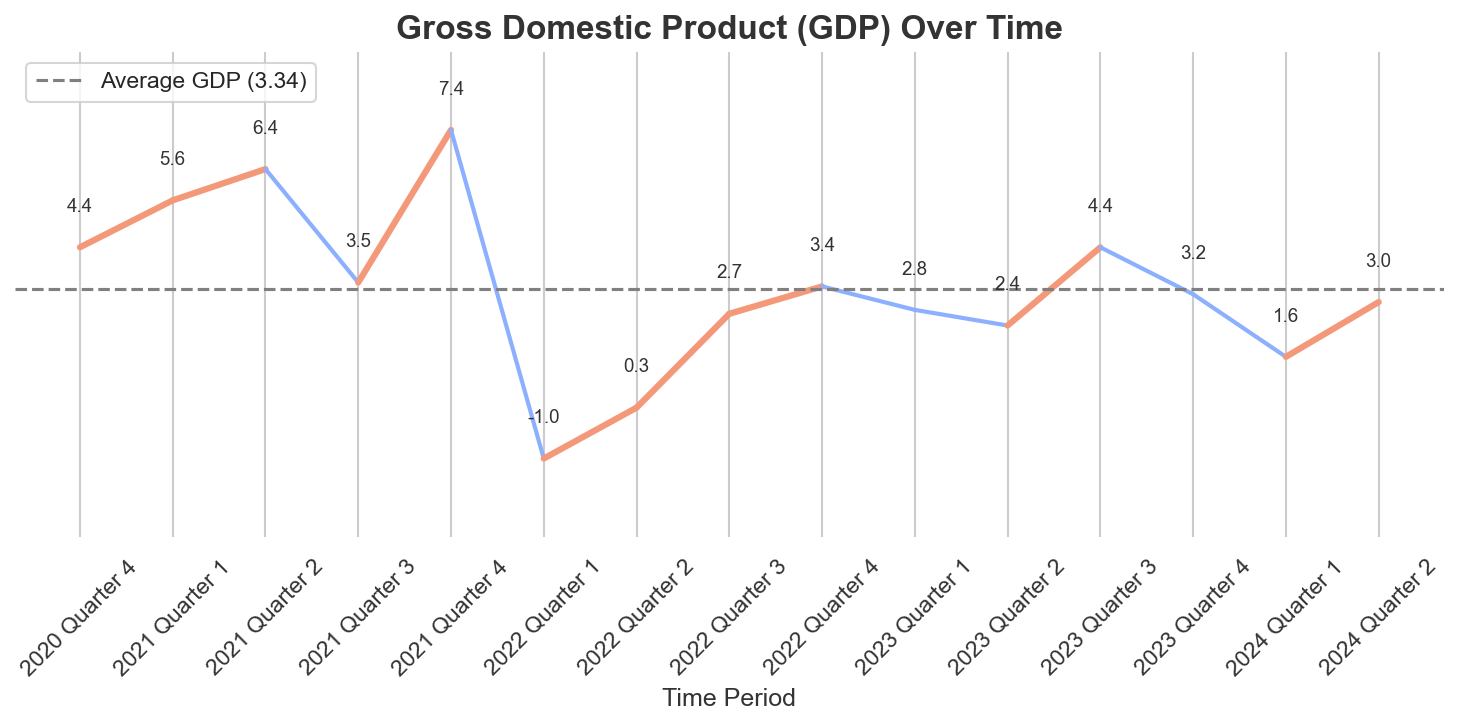

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use Seaborn's style with a custom background
sns.set(style="whitegrid")

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract GDP data for plotting (quarterly only) starting from 2020 Quarter 4
gdp_data = data_new.iloc[0]
quarterly_data = gdp_data.filter(like='_Q')[1:]  # Skip 2020 Quarter 3

# Rename quarterly periods to a more descriptive format
quarters = [label.replace('_Q', ' Quarter ') for label in quarterly_data.index]
gdp_values = quarterly_data.values.astype(float)

# Calculate the average GDP
average_gdp = gdp_values.mean()

# Set figure size and high DPI for better quality
plt.figure(figsize=(10, 5), dpi=150)

# Define colors for upward and downward trends using a visually appealing palette
up_color = sns.color_palette("coolwarm", 7)[5]
down_color = sns.color_palette("coolwarm", 7)[1]

# Plot line segments with appropriate color and stroke for trend changes
for i in range(1, len(gdp_values)):
    # Select color and line width based on the trend direction
    color = up_color if gdp_values[i] >= gdp_values[i - 1] else down_color
    linewidth = 3 if gdp_values[i] >= gdp_values[i - 1] else 2
    plt.plot(quarters[i-1:i+1], gdp_values[i-1:i+1], color=color, linestyle='-', linewidth=linewidth)

# Add the average GDP line
plt.axhline(y=average_gdp, color='gray', linestyle='--', linewidth=1.5, label=f'Average GDP ({average_gdp:.2f})')

# Add GDP value labels clearly above each data point
for i, value in enumerate(gdp_values):
    plt.text(quarters[i], value + 0.8, f"{value:.1f}", color='#333333', fontsize=9, ha='center', va='bottom')

# Customize plot appearance
plt.title('Gross Domestic Product (GDP) Over Time', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Time Period', fontsize=12, color='#333333')
plt.xticks(rotation=45, color='#333333')
plt.gca().yaxis.set_visible(False)  # Hide y-axis numbers

# Compact the chart by setting a narrower y-axis range
plt.ylim(min(gdp_values) - 2, max(gdp_values) + 2)

# Minimalist styling: remove unnecessary spines and only show y-axis grid lines
sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.3)

# Add a legend for the average line
plt.legend(loc="upper left")

plt.tight_layout()  # Adjust layout for readability
plt.show()


In [23]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 5.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [38]:
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")
# Replace `row_index` with the index number of the row you want to print
row_data = data_new.iloc[21]
print(row_data)


Line                                                          22
Description    Government consumption expenditures and gross ...
2021_Annual                                                 -0.3
2022_Annual                                                 -1.1
2023_Annual                                                  3.9
2020_Q3                                                     -6.0
2020_Q4                                                     -1.5
2021_Q1                                                      5.2
2021_Q2                                                     -4.2
2021_Q3                                                     -1.5
2021_Q4                                                     -0.3
2022_Q1                                                     -3.4
2022_Q2                                                     -1.5
2022_Q3                                                      1.6
2022_Q4                                                      5.4
2023_Q1                  

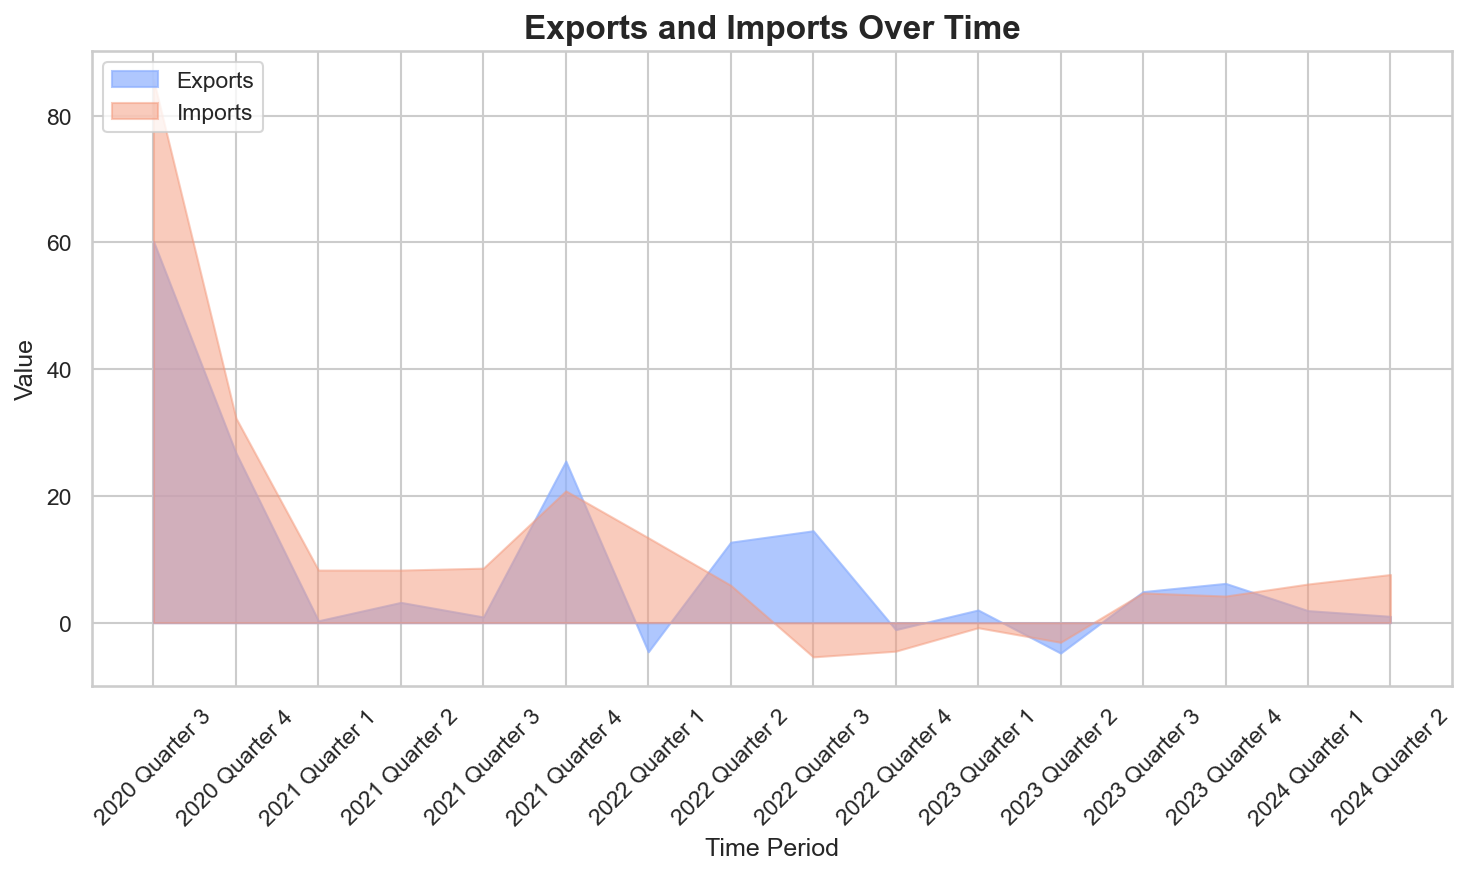

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract rows for Exports (row 15) and Imports (row 18)
exports_row = data_new.iloc[15]
imports_row = data_new.iloc[18]

# Extract the quarterly data for Exports and Imports
quarters = [col for col in exports_row.index if '_Q' in col]
export_values = exports_row[quarters].astype(float)
import_values = imports_row[quarters].astype(float)

# Rename quarters for clarity
quarters_renamed = [q.replace('_Q', ' Quarter ') for q in quarters]

# Plotting
plt.figure(figsize=(10, 6), dpi=150)

# Stacked area chart
plt.fill_between(quarters_renamed, export_values, color=sns.color_palette("coolwarm", 3)[0], alpha=0.7, label="Exports")
plt.fill_between(quarters_renamed, import_values, color=sns.color_palette("coolwarm", 3)[2], alpha=0.5, label="Imports")

# Add labels and title
plt.title('Exports and Imports Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left")

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()


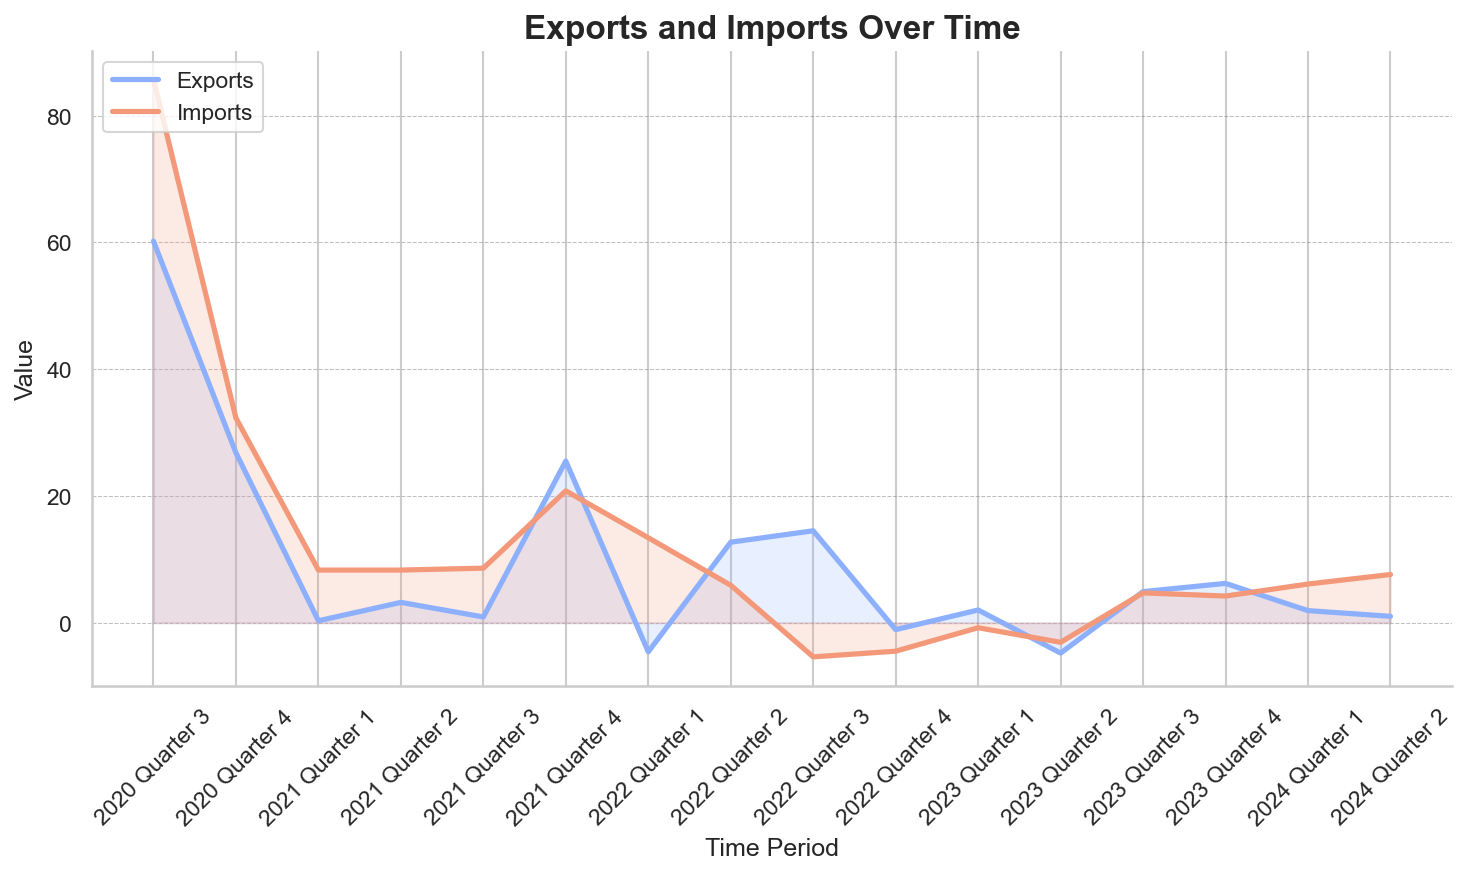

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract rows for Exports (row 15) and Imports (row 18)
exports_row = data_new.iloc[15]
imports_row = data_new.iloc[18]

# Extract the quarterly data for Exports and Imports
quarters = [col for col in exports_row.index if '_Q' in col]
export_values = exports_row[quarters].astype(float)
import_values = imports_row[quarters].astype(float)

# Rename quarters for clarity
quarters_renamed = [q.replace('_Q', ' Quarter ') for q in quarters]

# Plotting
plt.figure(figsize=(10, 6), dpi=150)

# Line chart with shaded area for Exports
plt.plot(quarters_renamed, export_values, color=sns.color_palette("coolwarm", 3)[0], linewidth=2.5, label="Exports")
plt.fill_between(quarters_renamed, export_values, color=sns.color_palette("coolwarm", 3)[0], alpha=0.2)

# Line chart with shaded area for Imports
plt.plot(quarters_renamed, import_values, color=sns.color_palette("coolwarm", 3)[2], linewidth=2.5, label="Imports")
plt.fill_between(quarters_renamed, import_values, color=sns.color_palette("coolwarm", 3)[2], alpha=0.2)

# Add labels and title
plt.title('Exports and Imports Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left")

# Grid and formatting
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
sns.despine()  # Remove unnecessary borders

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()


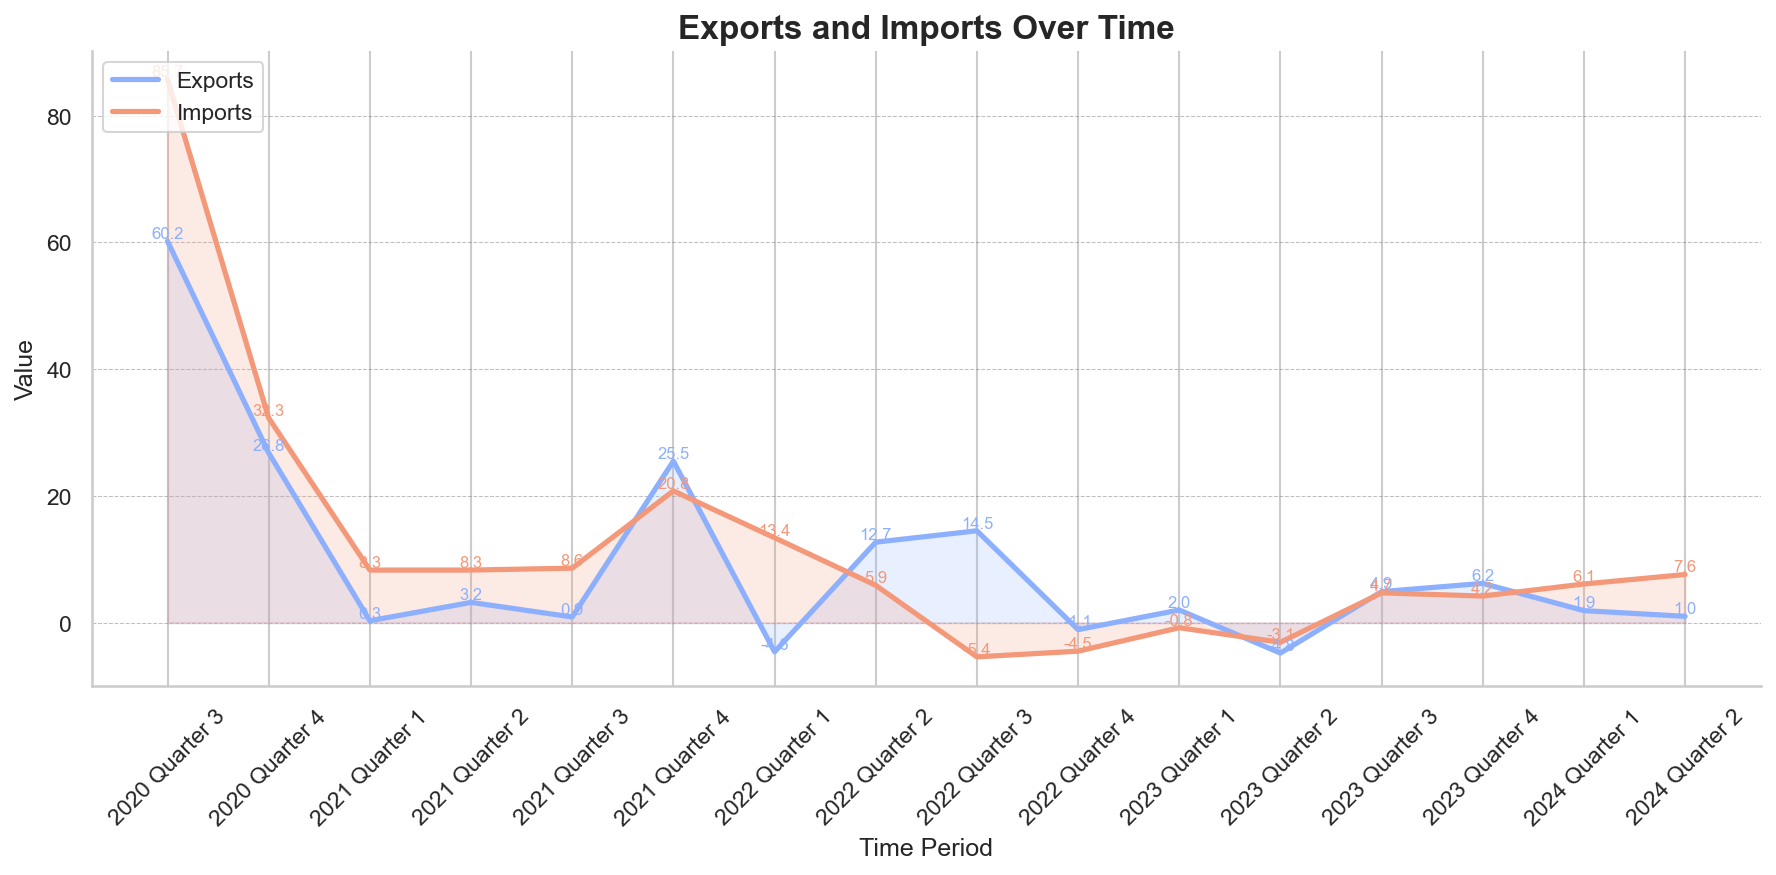

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract rows for Exports (row 15) and Imports (row 18)
exports_row = data_new.iloc[15]
imports_row = data_new.iloc[18]

# Extract the quarterly data for Exports and Imports
quarters = [col for col in exports_row.index if '_Q' in col]
export_values = exports_row[quarters].astype(float)
import_values = imports_row[quarters].astype(float)

# Rename quarters for clarity
quarters_renamed = [q.replace('_Q', ' Quarter ') for q in quarters]

# Plotting
plt.figure(figsize=(12, 6), dpi=150)

# Line chart with shaded area for Exports
plt.plot(quarters_renamed, export_values, color=sns.color_palette("coolwarm", 3)[0], linewidth=2.5, label="Exports")
plt.fill_between(quarters_renamed, export_values, color=sns.color_palette("coolwarm", 3)[0], alpha=0.2)

# Line chart with shaded area for Imports
plt.plot(quarters_renamed, import_values, color=sns.color_palette("coolwarm", 3)[2], linewidth=2.5, label="Imports")
plt.fill_between(quarters_renamed, import_values, color=sns.color_palette("coolwarm", 3)[2], alpha=0.2)

# Label each data point for Exports and Imports
for i, (exp, imp) in enumerate(zip(export_values, import_values)):
    plt.text(quarters_renamed[i], exp + 0.5, f"{exp:.1f}", color=sns.color_palette("coolwarm", 3)[0], ha='center', fontsize=8)
    plt.text(quarters_renamed[i], imp + 0.5, f"{imp:.1f}", color=sns.color_palette("coolwarm", 3)[2], ha='center', fontsize=8)

# Add labels and title
plt.title('Exports and Imports Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left")

# Grid and formatting
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
sns.despine()  # Remove unnecessary borders

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()


In [44]:
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")
# Replace `row_index` with the index number of the row you want to print
row_data = data_new.iloc[37]
print(row_data)


Line             36
Description     GDI
2021_Annual    11.5
2022_Annual    10.1
2023_Annual     5.3
2020_Q3        33.2
2020_Q4        18.3
2021_Q1         9.6
2021_Q2        12.0
2021_Q3        10.8
2021_Q4        14.0
2022_Q1        10.2
2022_Q2         9.1
2022_Q3         8.6
2022_Q4         2.3
2023_Q1         5.5
2023_Q2         4.0
2023_Q3         6.0
2023_Q4         6.7
2024_Q1         6.1
2024_Q2         6.0
Name: 37, dtype: object


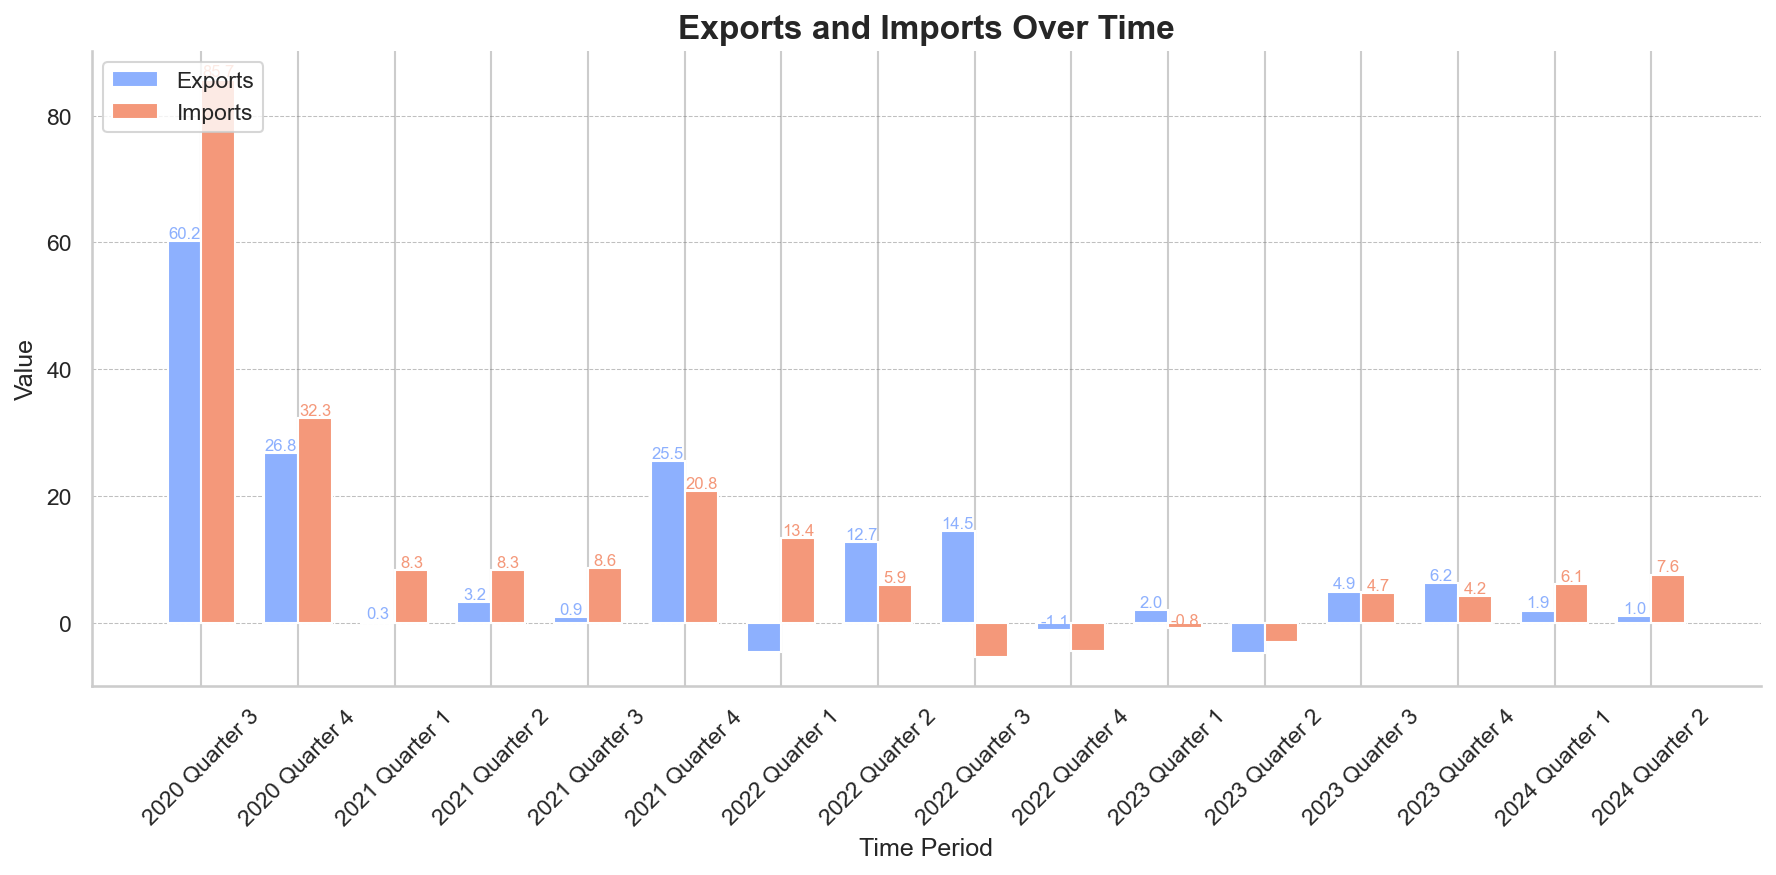

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract rows for Exports (row 15) and Imports (row 18)
exports_row = data_new.iloc[15]
imports_row = data_new.iloc[18]

# Extract the quarterly data for Exports and Imports
quarters = [col for col in exports_row.index if '_Q' in col]
export_values = exports_row[quarters].astype(float)
import_values = imports_row[quarters].astype(float)

# Rename quarters for clarity
quarters_renamed = [q.replace('_Q', ' Quarter ') for q in quarters]

# Plotting a grouped bar chart
plt.figure(figsize=(12, 6), dpi=150)
bar_width = 0.35  # Width of each bar

# Define positions for the bars on the x-axis
x = range(len(quarters_renamed))

# Plot bars for Exports and Imports
plt.bar([p - bar_width/2 for p in x], export_values, width=bar_width, color=sns.color_palette("coolwarm", 3)[0], label="Exports")
plt.bar([p + bar_width/2 for p in x], import_values, width=bar_width, color=sns.color_palette("coolwarm", 3)[2], label="Imports")

# Add labels on top of each bar
for i, (exp, imp) in enumerate(zip(export_values, import_values)):
    plt.text(i - bar_width/2, exp + 0.5, f"{exp:.1f}", ha='center', color=sns.color_palette("coolwarm", 3)[0], fontsize=8)
    plt.text(i + bar_width/2, imp + 0.5, f"{imp:.1f}", ha='center', color=sns.color_palette("coolwarm", 3)[2], fontsize=8)

# Add labels and title
plt.title('Exports and Imports Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(ticks=x, labels=quarters_renamed, rotation=45)
plt.legend(loc="upper left")

# Grid and formatting
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
sns.despine()  # Remove unnecessary borders

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()


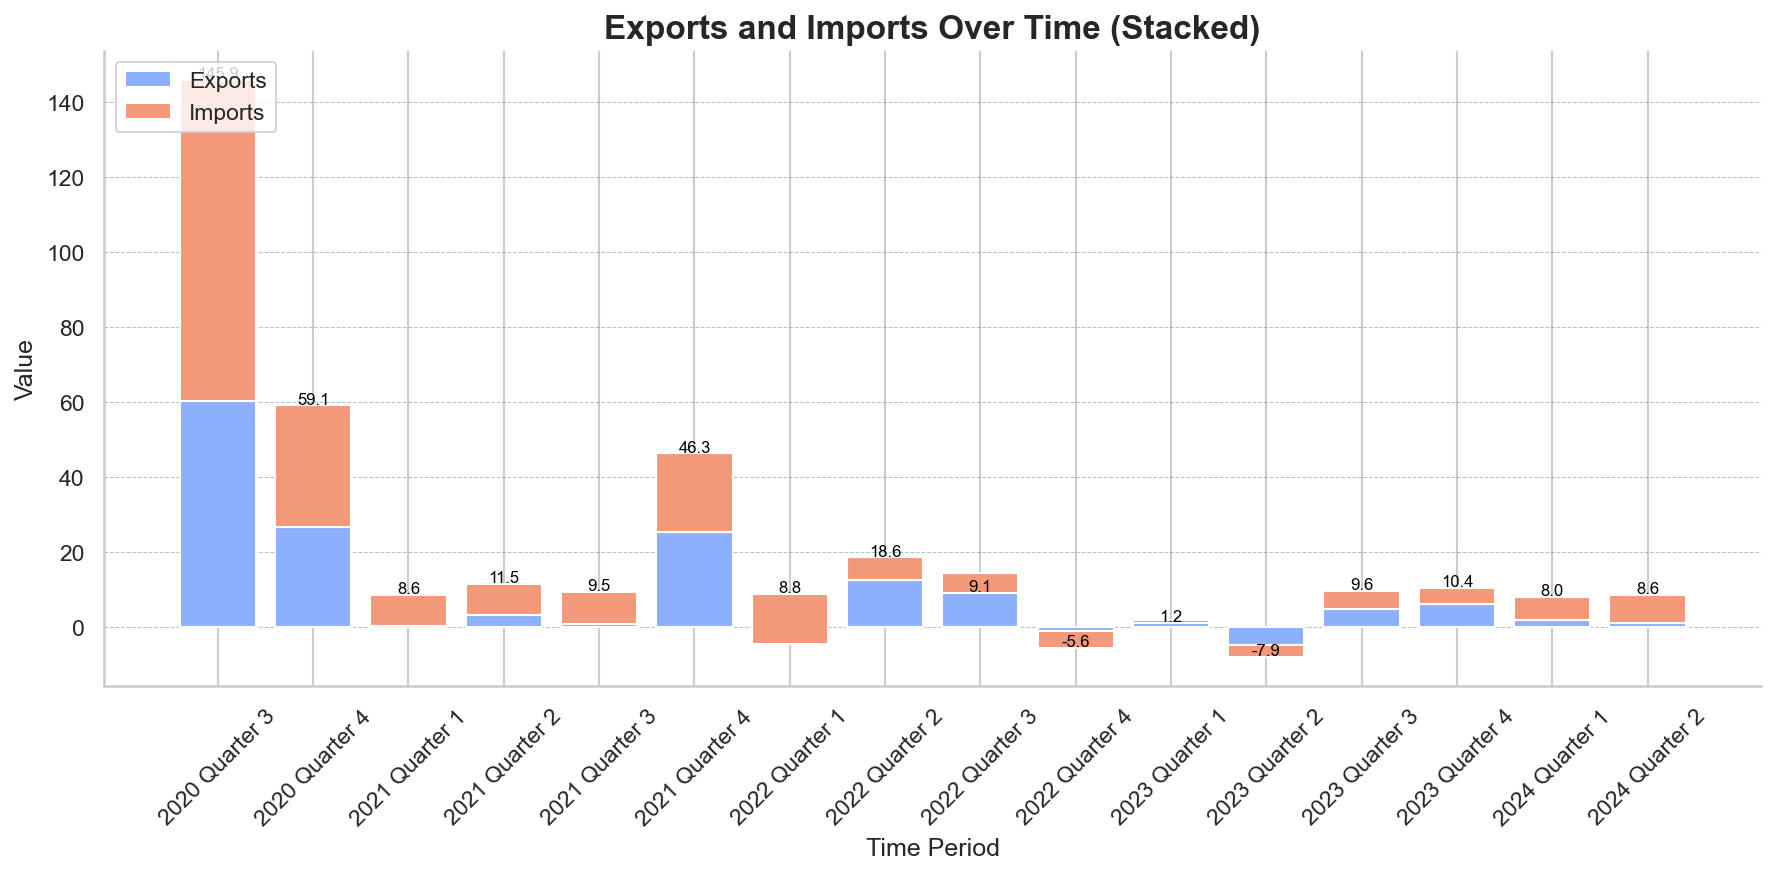

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract rows for Exports (row 15) and Imports (row 18)
exports_row = data_new.iloc[15]
imports_row = data_new.iloc[18]

# Extract the quarterly data for Exports and Imports
quarters = [col for col in exports_row.index if '_Q' in col]
export_values = exports_row[quarters].astype(float)
import_values = imports_row[quarters].astype(float)

# Rename quarters for clarity
quarters_renamed = [q.replace('_Q', ' Quarter ') for q in quarters]

# Plotting a stacked bar chart
plt.figure(figsize=(12, 6), dpi=150)

# Plot stacked bars for Exports and Imports
plt.bar(quarters_renamed, export_values, color=sns.color_palette("coolwarm", 3)[0], label="Exports")
plt.bar(quarters_renamed, import_values, bottom=export_values, color=sns.color_palette("coolwarm", 3)[2], label="Imports")

# Add labels on top of each stack for combined total
for i, (exp, imp) in enumerate(zip(export_values, import_values)):
    total = exp + imp
    plt.text(quarters_renamed[i], total + 0.5, f"{total:.1f}", ha='center', fontsize=8, color="black")

# Add labels and title
plt.title('Exports and Imports Over Time (Stacked)', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left")

# Grid and formatting
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
sns.despine()  # Remove unnecessary borders

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()


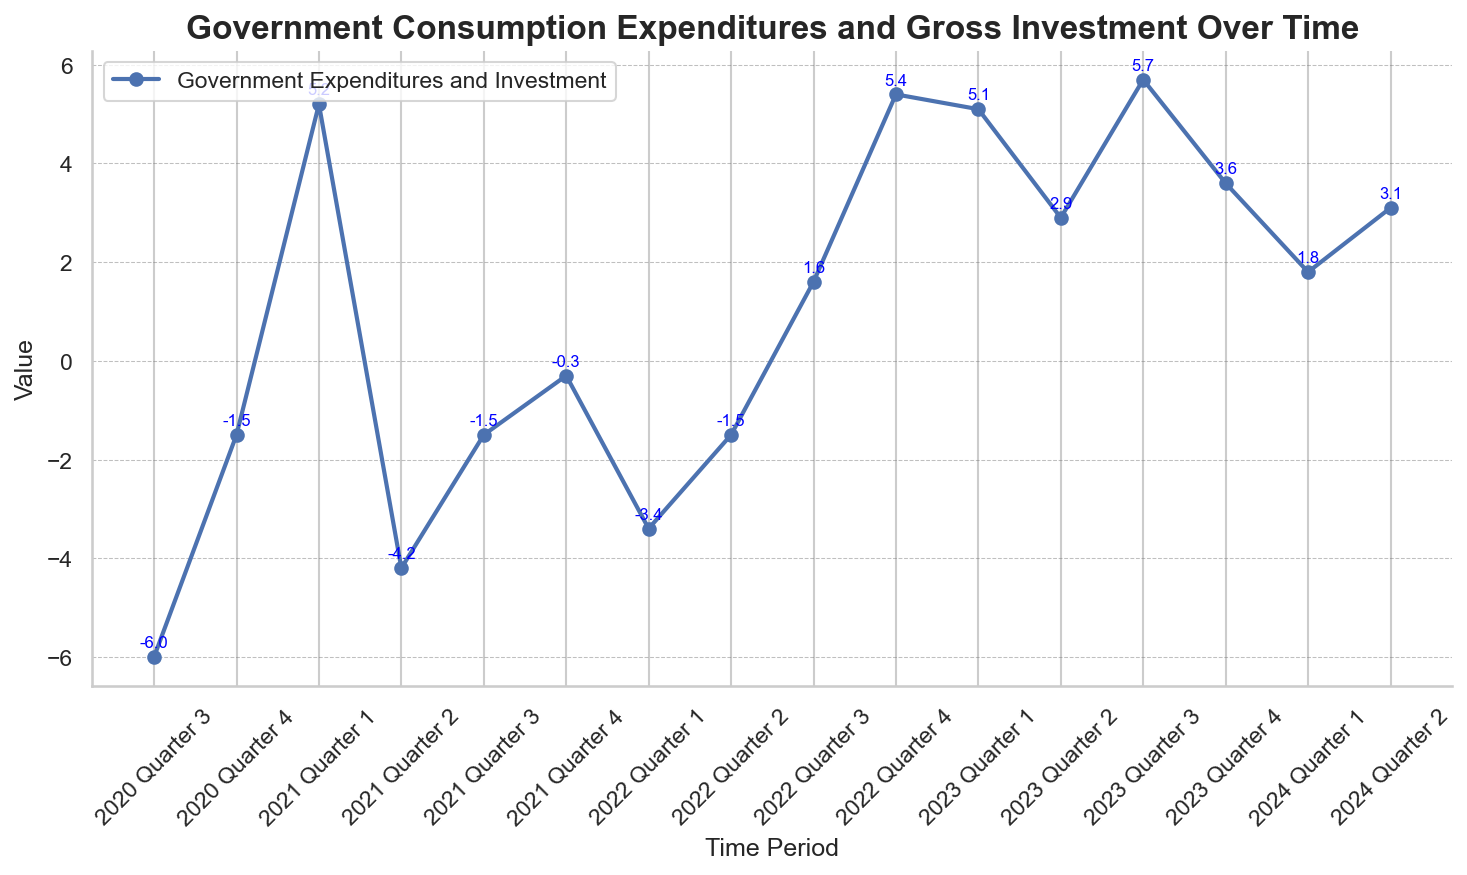

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the quarterly data from row_data
quarters = [col for col in row_data.index if '_Q' in col]
quarterly_values = row_data[quarters].astype(float)

# Rename quarters for clarity
quarters_renamed = [q.replace('_Q', ' Quarter ') for q in quarters]

# Plotting
plt.figure(figsize=(10, 6), dpi=150)

# Line chart for quarterly data
plt.plot(quarters_renamed, quarterly_values, color='b', linewidth=2, marker='o', label="Government Expenditures and Investment")

# Add data labels
for i, value in enumerate(quarterly_values):
    plt.text(quarters_renamed[i], value + 0.2, f"{value:.1f}", ha='center', fontsize=8, color="blue")

# Add labels and title
plt.title('Government Consumption Expenditures and Gross Investment Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc="upper left")

# Grid and formatting
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
sns.despine()  # Remove unnecessary borders

plt.tight_layout()  # Adjust layout to fit the plot
plt.show()


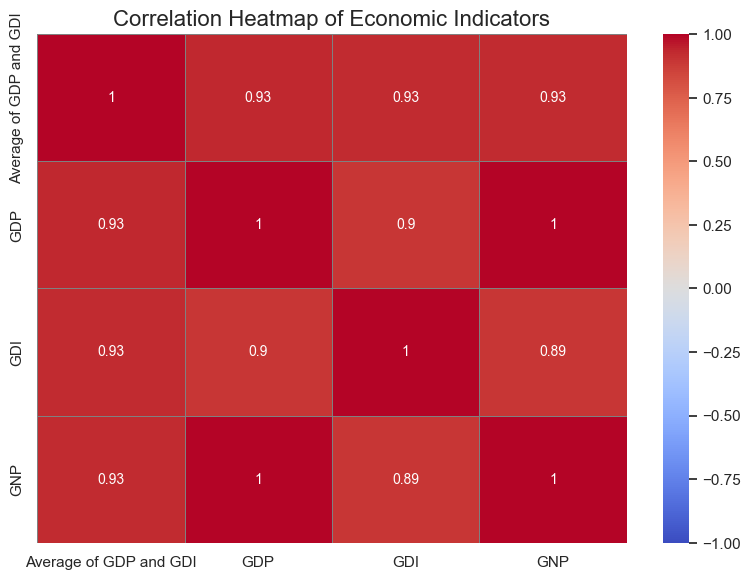

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Extract rows for each variable
row_28 = data_new.iloc[28]  # Average of GDP and GDI
row_36 = data_new.iloc[36]  # GDP
row_37 = data_new.iloc[37]  # GDI
row_43 = data_new.iloc[43]  # GNP

# Select only quarterly data columns (columns containing '_Q')
quarters = [col for col in row_28.index if '_Q' in col]

# Create a DataFrame for the selected quarters across each metric
data = pd.DataFrame({
    'Average of GDP and GDI': row_28[quarters].astype(float),
    'GDP': row_36[quarters].astype(float),
    'GDI': row_37[quarters].astype(float),
    'GNP': row_43[quarters].astype(float)
}, index=quarters)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, 
            annot_kws={"size": 10}, linewidths=0.5, linecolor='gray')

# Customize and display the plot
plt.title('Correlation Heatmap of Economic Indicators', fontsize=16)
plt.tight_layout()
plt.show()


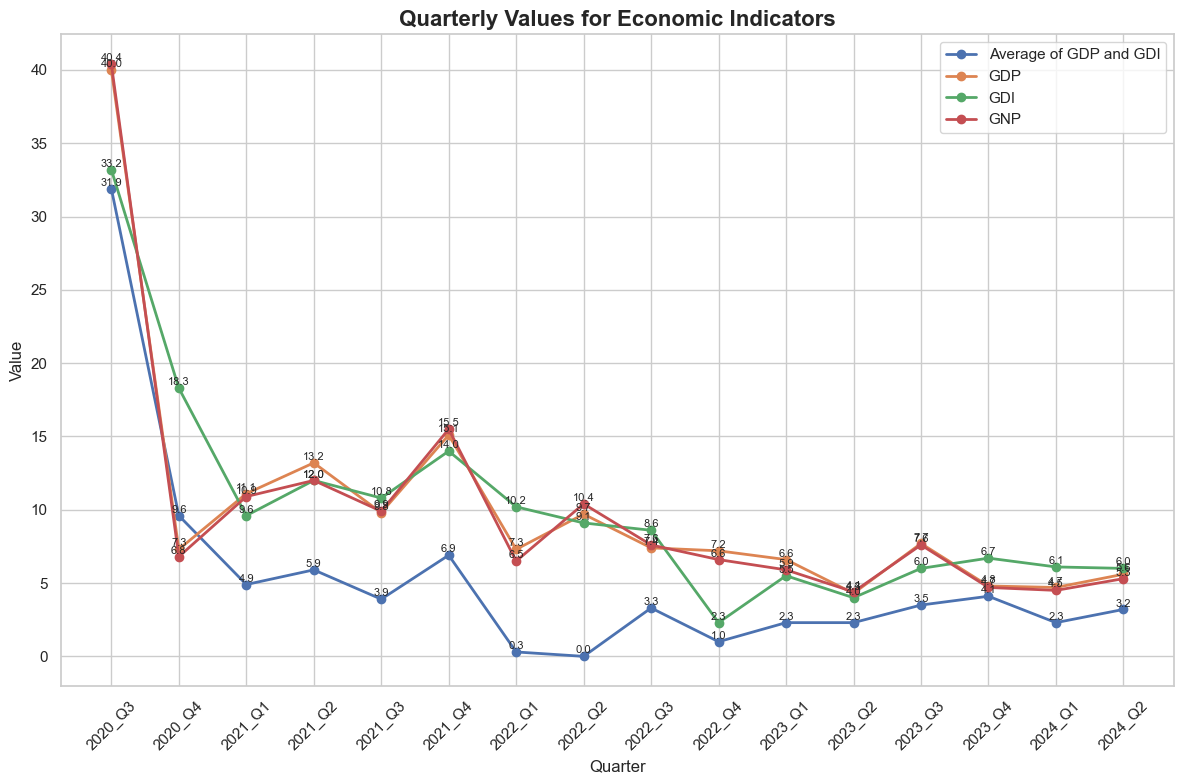

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")

# Select specific rows by their indices
rows_to_plot = {
    'Average of GDP and GDI': data_new.iloc[28],
    'GDP': data_new.iloc[36],
    'GDI': data_new.iloc[37],
    'GNP': data_new.iloc[43]
}

# Initialize plot
plt.figure(figsize=(12, 8))

# Loop through each row and plot it
for i, (label, row_data) in enumerate(rows_to_plot.items(), 1):
    # Extract only columns containing '_Q' for quarterly data
    quarters = [col for col in row_data.index if '_Q' in col]
    values = row_data[quarters].astype(float)
    
    # Plot each row as a scatter plot with labels
    plt.plot(quarters, values, marker='o', label=label, linewidth=2)
    for quarter, value in zip(quarters, values):
        plt.text(quarter, value + 0.2, f"{value:.1f}", ha='center', fontsize=8)

# Add title and labels
plt.title('Quarterly Values for Economic Indicators', fontsize=16, fontweight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
data_new = pd.read_csv("datasets/final-worked_gdp_data.csv")
# Replace `row_index` with the index number of the row you want to print
row_data = data_new.iloc[28]
row_data1 = data_new.iloc[36]
row_data2 = data_new.iloc[37]
row_data3 = data_new.iloc[43]
print(row_data)
